In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [16]:
data["age"].max(),data["age"].min()

(80.0, 0.1667)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data.drop("survived",axis=1),data['survived'],test_size=0.3,random_state=0)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((916, 2), (393, 2), (916,), (393,))

In [6]:
def impute_na(data, variable):
    df = data.copy()
    df[variable + '_random'] = df[variable]
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample
    return df[variable + '_random']

In [7]:
X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')
X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

In [12]:
X_train.head()

,age,fare
501,13.0,19.5000
588,4.0,23.0000
402,30.0,13.8583
1193,40.5,7.7250
686,22.0,7.7250


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

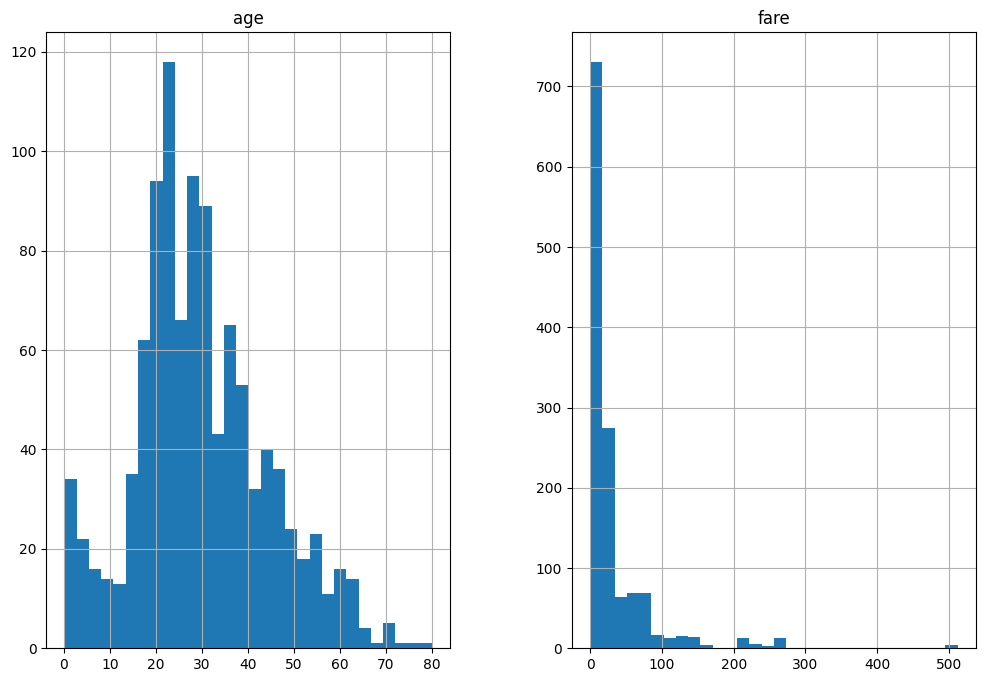

In [9]:
data[["age","fare"]].hist(bins=30,figsize=(12,8))

## Equal Width

In [13]:
disc = KBinsDiscretizer(
    n_bins = 8,
    encode = "ordinal",
    strategy = "uniform",
    subsample=None
)
disc.set_output(transform="pandas")
disc.fit(X_train[["age","fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=8, strategy='uniform', subsample=None)

In [14]:
disc.bin_edges_

array([array([ 0.1667   ,  9.3958625, 18.625025 , 27.8541875, 37.08335  ,
              46.3125125, 55.541675 , 64.7708375, 74.       ])           ,
       array([  0.     ,  64.04115, 128.0823 , 192.12345, 256.1646 , 320.20575,
              384.2469 , 448.28805, 512.3292 ])                                ],
      dtype=object)

In [17]:
train_t = disc.transform(X_train[["age","fare"]])
test_t = disc.transform(X_test[["age","fare"]])

In [18]:
train_t.head()

,age,fare
501,1.0,0.0
588,0.0,0.0
402,3.0,0.0
1193,4.0,0.0
686,2.0,0.0


Text(0, 0.5, 'Number of observations per bin')

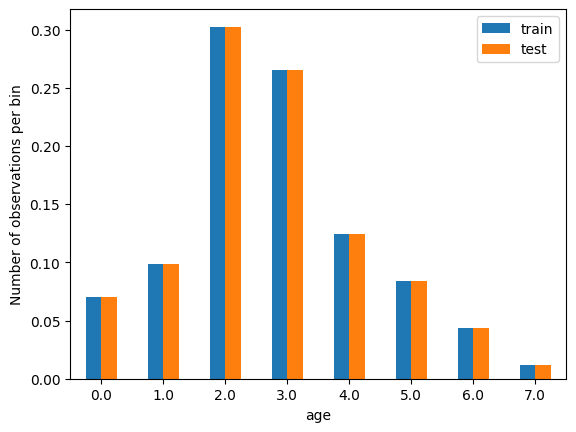

In [20]:
t1 = train_t["age"].value_counts(normalize=True).sort_index()
t2 = train_t["age"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

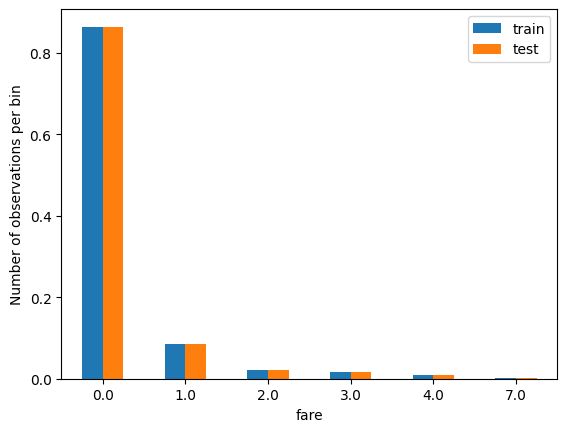

In [21]:
t1 = train_t["fare"].value_counts(normalize=True).sort_index()
t2 = train_t["fare"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Equal Frequency

In [22]:
X_train.head()

,age,fare
501,13.0,19.5000
588,4.0,23.0000
402,30.0,13.8583
1193,40.5,7.7250
686,22.0,7.7250


In [23]:
disc = KBinsDiscretizer(
    n_bins = 10,
    encode = "ordinal",
    strategy = "quantile"
)
disc.set_output(transform="pandas")
disc.fit(X_train[["age","fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [24]:
disc.bin_edges_

array([array([ 0.1667, 16.    , 20.    , 22.    , 25.    , 28.    , 31.    ,
              36.    , 42.    , 50.    , 74.    ])                          ,
       array([  0.    ,   7.55  ,   7.7958,   8.05  ,  10.5   ,  14.4542,
               21.075 ,  26.55  ,  40.125 ,  79.025 , 512.3292])         ],
      dtype=object)

In [25]:
train_t = disc.transform(X_train[["age","fare"]])
test_t = disc.transform(X_test[["age","fare"]])

In [26]:
train_t.head()

,age,fare
501,0.0,5.0
588,0.0,6.0
402,5.0,4.0
1193,7.0,1.0
686,3.0,1.0


Text(0, 0.5, 'Number of observations per bin')

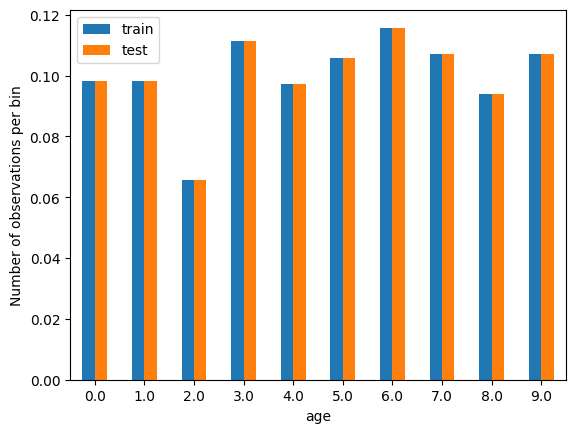

In [27]:
t1 = train_t["age"].value_counts(normalize=True).sort_index()
t2 = train_t["age"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

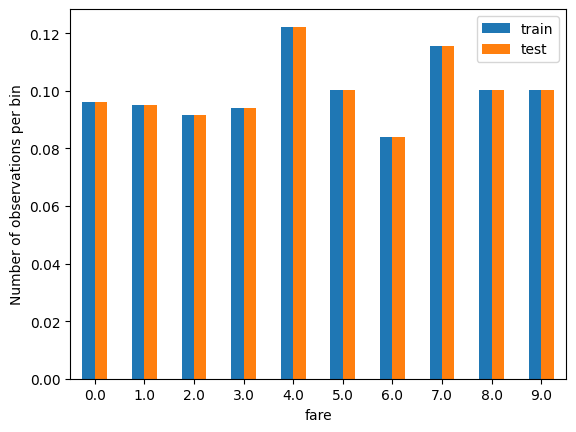

In [28]:
t1 = train_t["fare"].value_counts(normalize=True).sort_index()
t2 = train_t["fare"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Arbitary Frequency

In [29]:
data = pd.read_csv('titanic.csv', usecols=['age', 'survived'])

data.head()

,survived,age
0,1,29.0000
1,1,0.9167
2,0,2.0000
3,0,30.0000
4,0,25.0000


In [30]:
data['age'] = impute_na(data, 'age')

In [31]:
buckets = [0,20,40,60,100]
labels = ['0-20', '20-40', '40-60', '>60']

In [32]:
data["Age_bucket_labels"] = pd.cut(data["age"], bins=buckets, labels=labels, include_lowest=True)

In [33]:
data.head()

,survived,age,Age_bucket_labels
0,1,29.0000,20-40
1,1,0.9167,0-20
2,0,2.0000,0-20
3,0,30.0000,20-40
4,0,25.0000,20-40


<ipython-input-34-73a21ecd16b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Age_bucket_labels")["survived"].mean().plot.bar()


<Axes: xlabel='Age_bucket_labels'>

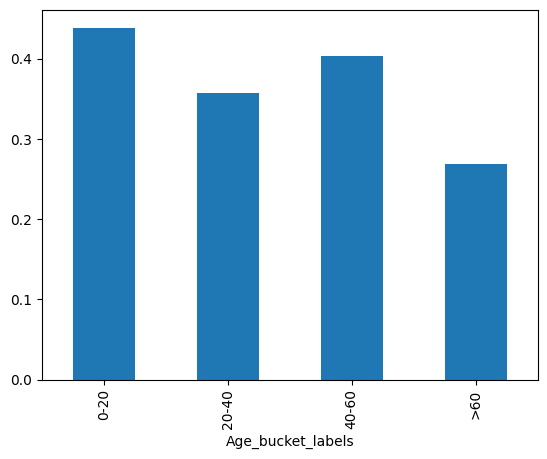

In [34]:
data.groupby("Age_bucket_labels")["survived"].mean().plot.bar()

<ipython-input-35-d4ddde37cabe>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Age_bucket_labels")["age"].count().plot.bar()


<Axes: xlabel='Age_bucket_labels'>

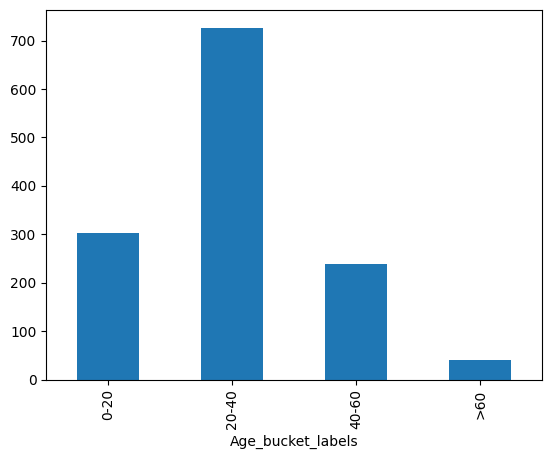

In [35]:
data.groupby("Age_bucket_labels")["age"].count().plot.bar()

## Discretisation by K_Means

In [36]:
X_train.head()

,age,fare
501,13.0,19.5000
588,4.0,23.0000
402,30.0,13.8583
1193,40.5,7.7250
686,22.0,7.7250


In [38]:
disc = KBinsDiscretizer(
    n_bins = 4,
    encode = "ordinal",
    strategy = "kmeans",
    subsample = None
)

In [39]:
disc.set_output(transform="pandas")

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans', subsample=None)

In [40]:
disc.fit(X_train[['age','fare']])

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans', subsample=None)

In [41]:
disc.bin_edges_

array([array([ 0.1667    , 19.35059866, 34.06303553, 50.22640292, 74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
              512.3292    ])                                         ],
      dtype=object)

In [42]:
train_t = disc.transform(X_train[['age','fare']])
test_t = disc.transform(X_test[['age','fare']])

Text(0, 0.5, 'Number of observations per bin')

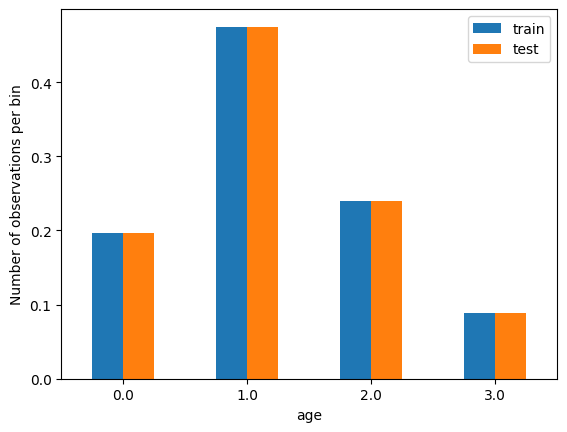

In [43]:
t1 = train_t["age"].value_counts(normalize=True).sort_index()
t2 = train_t["age"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

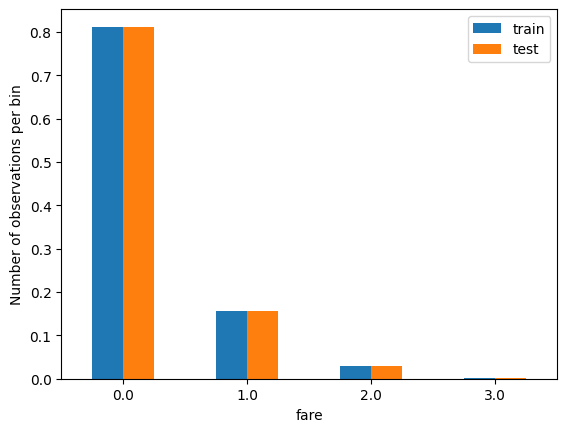

In [44]:
t1 = train_t["fare"].value_counts(normalize=True).sort_index()
t2 = train_t["fare"].value_counts(normalize=True).sort_index()
tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ["train","test"]
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [46]:
data = pd.read_csv("titanic.csv",usecols=['age', 'fare', 'survived'])

In [47]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((916, 2), (393, 2))

In [49]:
X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')
X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

In [50]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train['age'].to_frame(), y_train)

DecisionTreeClassifier(max_depth=2)

In [53]:
X_train['age_prob'] = np.round(
    tree_model.predict_proba(X_train['age'].to_frame())[:, 1], 3)
X_test['age_prob'] = np.round(
    tree_model.predict_proba(X_test['age'].to_frame())[:, 1], 3)

In [54]:
X_train.head()

,age,fare,age_prob
501,13.0,19.5000,0.611
588,4.0,23.0000,0.458
402,30.0,13.8583,0.393
1193,40.5,7.7250,0.393
686,22.0,7.7250,0.393


In [56]:
X_train['age_prob'].unique()

array([0.611, 0.458, 0.393, 0.287])

Text(0, 0.5, 'Survived')

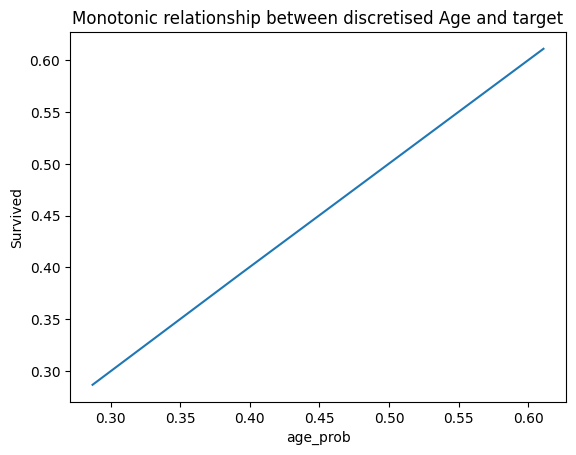

In [57]:
# monotonic relation
y_train.groupby(X_train['age_prob']).mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

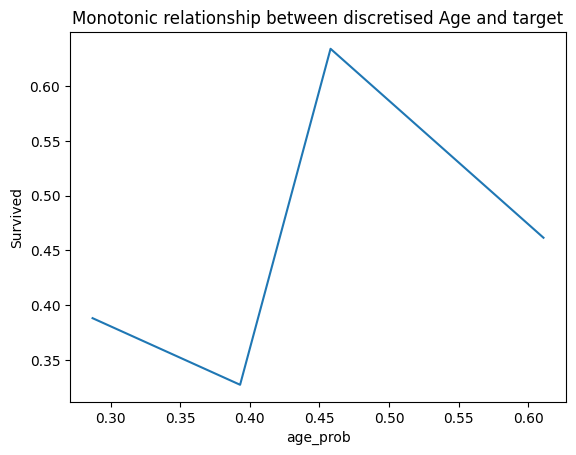

In [58]:
y_test.groupby(X_test['age_prob']).mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

<Axes: xlabel='age_prob'>

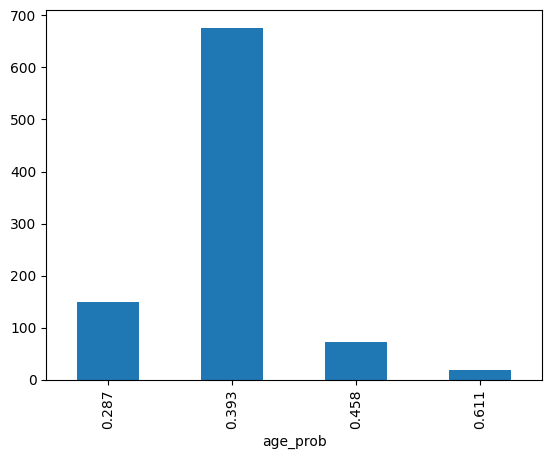

In [59]:
X_train['age_prob'].value_counts().sort_index().plot.bar()

<Axes: xlabel='age_prob'>

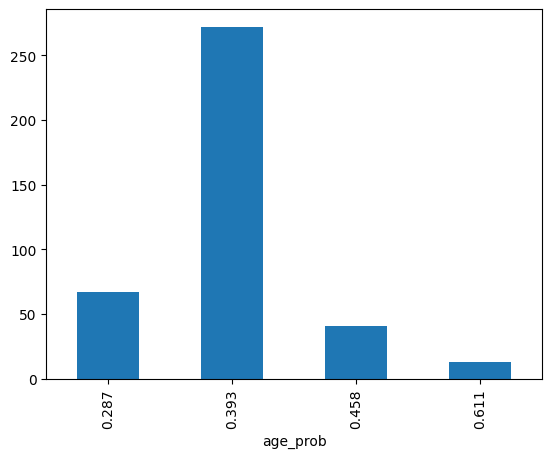

In [60]:
X_test['age_prob'].value_counts().sort_index().plot.bar()

In [61]:
tmp = pd.concat( [X_train.groupby(['age_prob'])['age'].min(),X_train.groupby(['age_prob'])['age'].max()], axis=1)
tmp.columns = ["min", "max"]
tmp

,min,max
age_prob,,
0.287,16.0000,21.0
0.393,22.0000,74.0
0.458,0.1667,11.5
0.611,12.0000,15.0


In [66]:
buckets = list(X_train.groupby(['age_prob'])['age'].min().sort_values().values)
buckets.append(X_train['age'].max())

In [67]:
buckets

[0.1667, 12.0, 16.0, 22.0, 74.0]

In [68]:
labels = ['0-11','12-15','16-21','22-75']

In [69]:
data["Age_bucket_labels"] = pd.cut(data["age"], bins=buckets, labels=labels, include_lowest=True)

In [70]:
data.head()

,survived,age,fare,Age_bucket_labels
0,1,29.0000,211.3375,22-75
1,1,0.9167,151.5500,0-11
2,0,2.0000,151.5500,0-11
3,0,30.0000,151.5500,22-75
4,0,25.0000,151.5500,22-75


In [71]:
# optimize decision tree
from sklearn.model_selection import GridSearchCV

In [72]:
parameters = {'max_depth':[1, 2, 3, 4]}

In [73]:
clf = GridSearchCV(tree_model,parameters,cv=3,refit=True)

In [77]:
clf.fit(X_train['age'].to_frame(),y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 3, 4]})

In [78]:
clf.best_params_

{'max_depth': 2}

<ipython-input-79-73a21ecd16b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Age_bucket_labels")["survived"].mean().plot.bar()


<Axes: xlabel='Age_bucket_labels'>

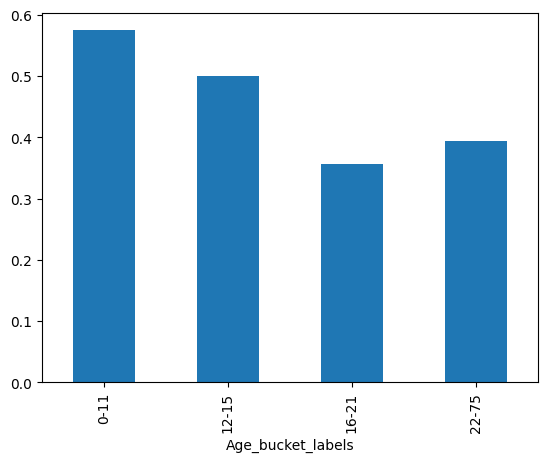

In [79]:
data.groupby("Age_bucket_labels")["survived"].mean().plot.bar()

<ipython-input-80-d4ddde37cabe>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Age_bucket_labels")["age"].count().plot.bar()


<Axes: xlabel='Age_bucket_labels'>

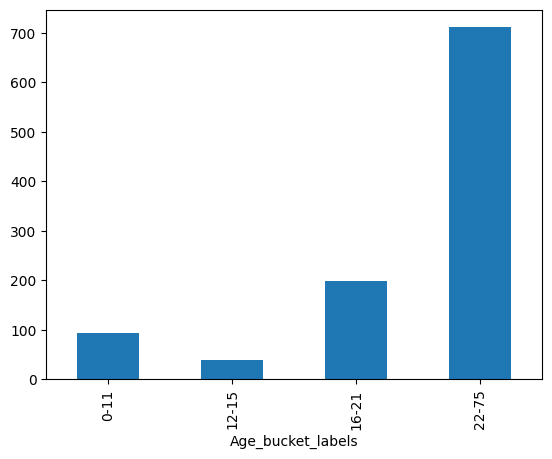

In [80]:
data.groupby("Age_bucket_labels")["age"].count().plot.bar()